# Heart Failure Prediction
from the various variable in the dataset we have to predict Death event correctly. So we have to make a classifier model which can predict heart failure death event correctly.
About the data:
Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worlwide.
Heart failure is a common event caused by CVDs and this dataset contains 12 features that can be used to predict mortality by heart failure.

Most cardiovascular diseases can be prevented by addressing behavioural risk factors such as tobacco use, unhealthy diet and obesity, physical inactivity and harmful use of alcohol using population-wide strategies.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help

## Importing basic libraraies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = df = pd.read_csv('C:/Users/NanoComputer/Desktop/new/heart_failure_clinical_records_dataset.csv')

In [3]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

# Correlation checking
here we check the correlations between various variable in the dataset. But we have to focus on the correalations between DEATH_EVENT with other variables

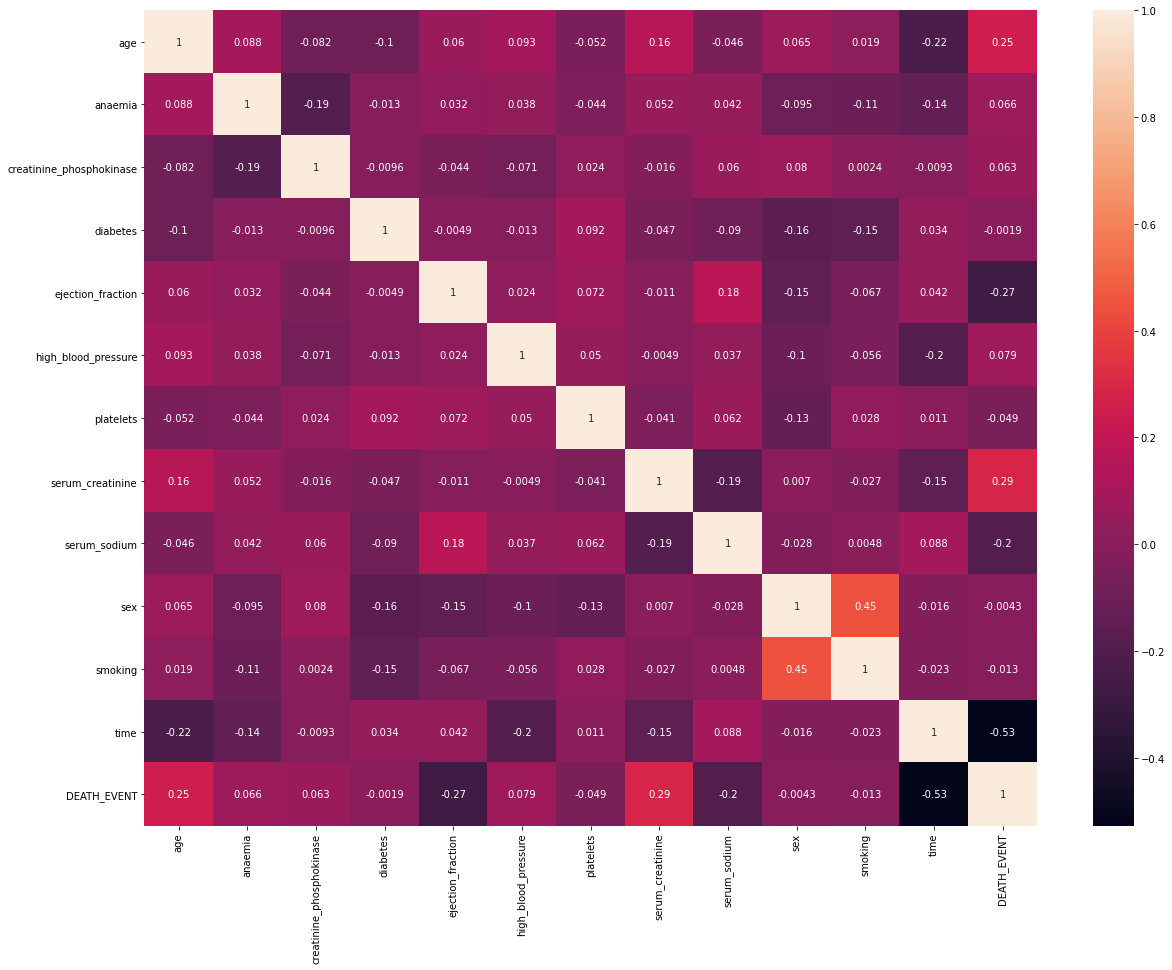

In [5]:
import seaborn as sns
plt.rcParams['figure.figsize']=20,15
df_corr = df.corr(method='pearson')
sns.heatmap(df_corr,annot=True)
plt.show()

In [6]:
df_corr['DEATH_EVENT'].sort_values(ascending=False)

DEATH_EVENT                 1.000000
serum_creatinine            0.294278
age                         0.253729
high_blood_pressure         0.079351
anaemia                     0.066270
creatinine_phosphokinase    0.062728
diabetes                   -0.001943
sex                        -0.004316
smoking                    -0.012623
platelets                  -0.049139
serum_sodium               -0.195204
ejection_fraction          -0.268603
time                       -0.526964
Name: DEATH_EVENT, dtype: float64

## detecting the important predictors
from the correlation we can see that 'serum_creatininn','age' are the important positive predictors and 'serum_sodium','ejection_fraction','time' are the important negetive predictors which will help us to predict DEATH_EVENT

In [7]:
prediction_df = df.loc[:,['serum_creatinine','age','serum_sodium','ejection_fraction','time','DEATH_EVENT']]
prediction_df.head()

,serum_creatinine,age,serum_sodium,ejection_fraction,time,DEATH_EVENT
0,1.9,75.0,130,20,4,1
1,1.1,55.0,136,38,6,1
2,1.3,65.0,129,20,7,1
3,1.9,50.0,137,20,7,1
4,2.7,65.0,116,20,8,1


In [8]:
X = prediction_df.iloc[:,:-1].values
Y = prediction_df.iloc[:,-1].values

In [9]:
X

array([[  1.9,  75. , 130. ,  20. ,   4. ],
       [  1.1,  55. , 136. ,  38. ,   6. ],
       [  1.3,  65. , 129. ,  20. ,   7. ],
       ...,
       [  0.8,  45. , 138. ,  60. , 278. ],
       [  1.4,  45. , 140. ,  38. , 280. ],
       [  1.6,  50. , 136. ,  45. , 285. ]])

In [10]:
Y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtyp

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size= 0.2,random_state = 1)

In [12]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(239, 5)
(239,)
(60, 5)
(60,)


## Applying different models for prediction

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

LogisticRegression

Accuracy Score: 0.8833333333333333

Cross Validation Score:  [0.7        0.8        0.73333333 0.83333333 0.83333333 0.8
 0.9        0.86206897]

Mean accuray from cross validation:  80.77586206896552


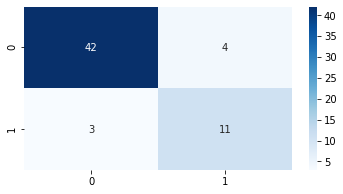

KNeighborsClassifier

Accuracy Score: 0.9

Cross Validation Score:  [0.8        0.86666667 0.83333333 0.83333333 0.76666667 0.8
 0.86666667 0.89655172]

Mean accuray from cross validation:  83.29022988505747


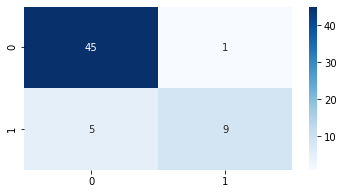

RandomForestClassifier

Accuracy Score: 0.9333333333333333

Cross Validation Score:  [0.76666667 0.8        0.83333333 0.86666667 0.8        0.73333333
 0.83333333 0.96551724]

Mean accuray from cross validation:  82.48563218390805


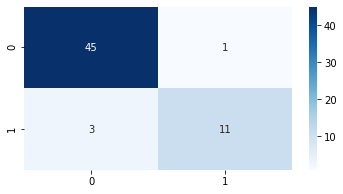

GradientBoostingClassifier

Accuracy Score: 0.8

Cross Validation Score:  [0.8        0.86666667 0.86666667 0.86666667 0.8        0.76666667
 0.86666667 0.86206897]

Mean accuray from cross validation:  83.6925287356322


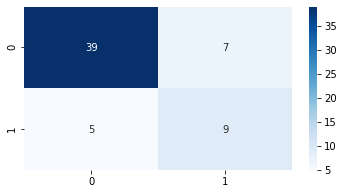

SVC

Accuracy Score: 0.9

Cross Validation Score:  [0.73333333 0.76666667 0.73333333 0.83333333 0.83333333 0.76666667
 0.9        0.86206897]

Mean accuray from cross validation:  80.35919540229885


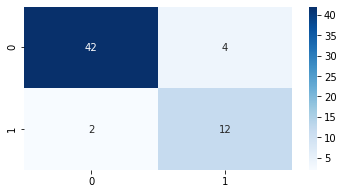

SVC

Accuracy Score: 0.9

Cross Validation Score:  [0.8        0.86666667 0.83333333 0.83333333 0.76666667 0.76666667
 0.86666667 0.93103448]

Mean accuray from cross validation:  83.30459770114942


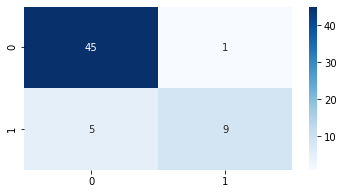

DecisionTreeClassifier

Accuracy Score: 0.9

Cross Validation Score:  [0.76666667 0.83333333 0.83333333 0.83333333 0.86666667 0.7
 0.7        0.86206897]

Mean accuray from cross validation:  79.94252873563218


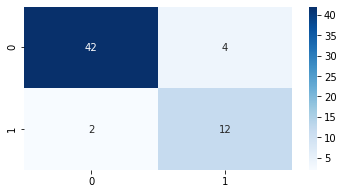

In [14]:
plt.rcParams['figure.figsize']=6,3
classifier = [LogisticRegression(),KNeighborsClassifier(n_neighbors=10),RandomForestClassifier(n_estimators=10,criterion='entropy'),
             GradientBoostingClassifier(n_estimators=10),SVC(kernel='linear'),SVC(kernel='rbf'),DecisionTreeClassifier(criterion='entropy')]
for i in classifier:
    i.fit(X_train,Y_train)
    Predicted = i.predict(X_test)
    print(str(type(i)).split('.')[3][:-2])
    print("\nAccuracy Score: {}".format(accuracy_score(Y_test,Predicted)))
    crossval =cross_val_score(i,X=X_train,y= Y_train,cv = 8)
    print("\nCross Validation Score: ",crossval)
    print('\nMean accuray from cross validation: ',crossval.mean()*100)
    cm = confusion_matrix(Y_test,Predicted)
    sns.heatmap(cm,annot=True,cmap='Blues')
    plt.show()

 ### result
 We can see that Gradient Boosting and K Neighbors Classifier has good success rate in predicting the result.
 ##### But we dont know the optimal number of estimators for Gradient Boosting Classifier or optimal number of neighbors for K Neighbors
 so we have to test what is the optimal number of estimator or classifier for both off the classifier

In [15]:
accuracy = []
for i in range(1,20):
    acc =GradientBoostingClassifier(n_estimators=i).fit(X_train,Y_train).predict(X_test)
    accuracy.append(accuracy_score(Y_test,acc))

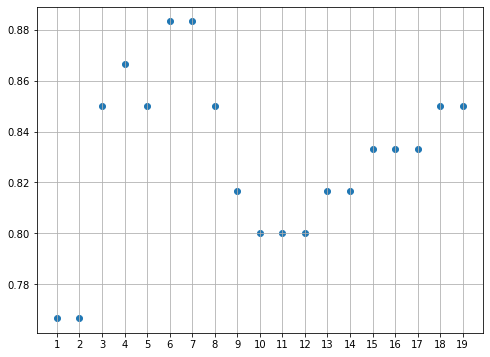

In [16]:
plt.figure(figsize=(8,6))
plt.scatter(np.arange(1,20,step=1),accuracy)
plt.xticks(np.arange(1,20))
plt.grid()
plt.show()

In [17]:
accuracy = []
for i in range(1,20):
    acc =KNeighborsClassifier(n_neighbors=i).fit(X_train,Y_train).predict(X_test)
    accuracy.append(accuracy_score(Y_test,acc))

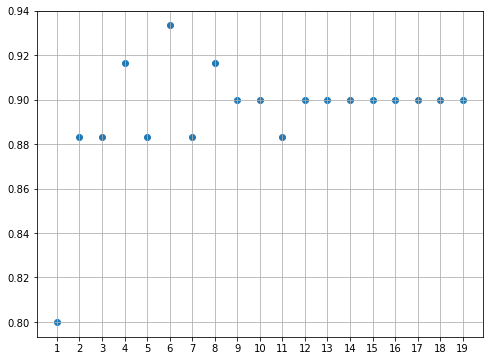

In [18]:
plt.figure(figsize=(8,6))
plt.scatter(np.arange(1,20,step=1),accuracy)
plt.xticks(np.arange(1,20))
plt.grid()
plt.show()

### From the Graphs we can see that optimal number of estimator for Gradient Boosting Classifier is 6 & 7 and optimal number of neighbors for K Neighbors classifier is 6.But from the graph it is clear that K Neighbors classifier has better prediction rate ,so we take the K Neighbors classifier with neighbors 6 as our best model
Now applying the model to the dataset

In [19]:
classifier = KNeighborsClassifier(n_neighbors=6,metric='minkowski', p=2)
classifier.fit(X_train,Y_train)
pred = classifier.predict(X_test)

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        46
           1       1.00      0.71      0.83        14

    accuracy                           0.93        60
   macro avg       0.96      0.86      0.90        60
weighted avg       0.94      0.93      0.93        60



[]

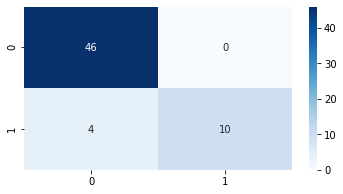

In [20]:
print(classification_report(Y_test,pred))
cm = confusion_matrix(Y_test,pred)
sns.heatmap(cm,cmap='Blues',annot=True)
plt.plot()